<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Commputer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

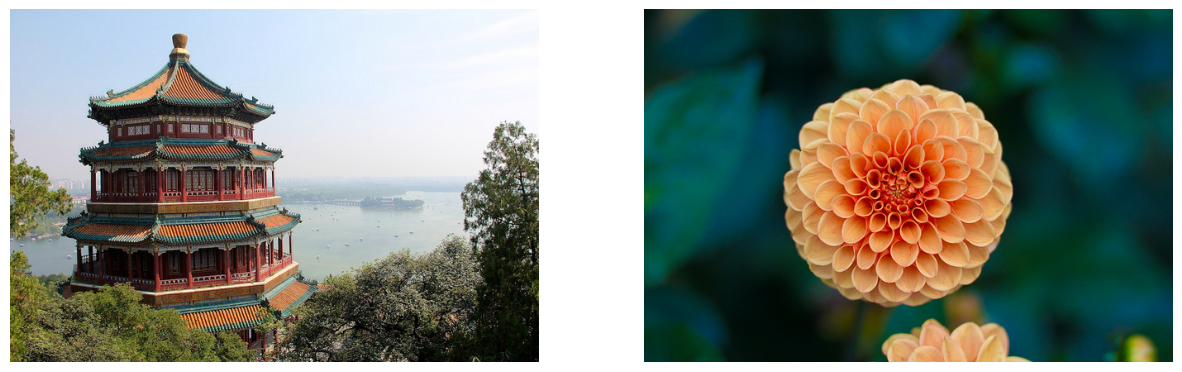

In [2]:
images= load_sample_images()["images"]
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

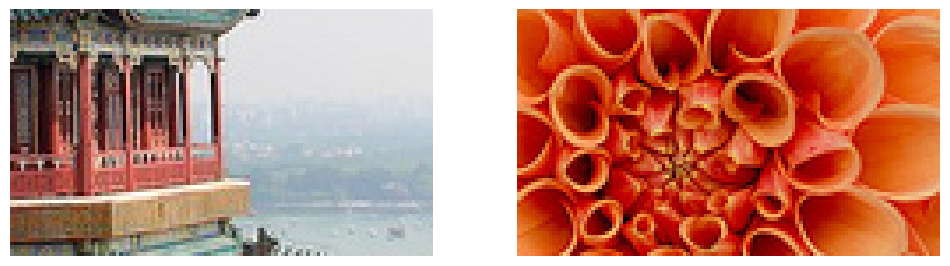

In [3]:
images=tf.keras.layers.CenterCrop(height=70, width=120)(images)
images=tf.keras.layers.Rescaling(scale=1 / 255.)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off');

In [4]:
images.shape

TensorShape([2, 70, 120, 3])

In [6]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps=conv_layer(images)

In [7]:
fmaps.shape

TensorShape([2, 64, 114, 32])

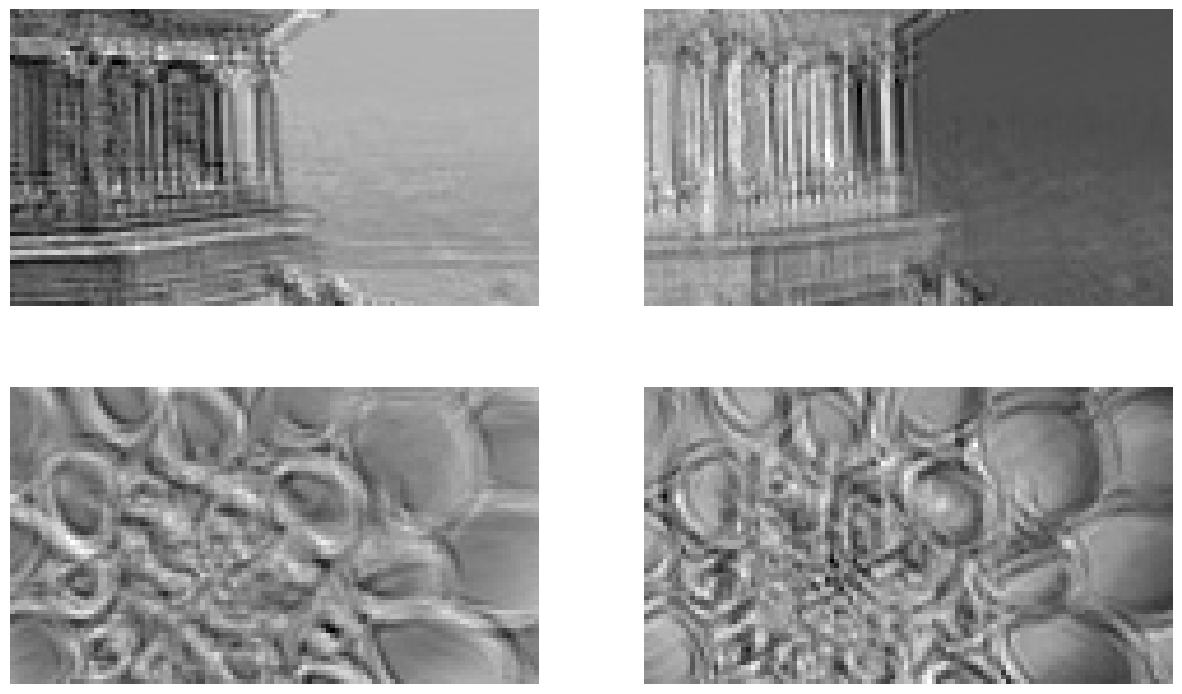

In [8]:
#extra code - displays two output feature maps for each image

plt.figure(figsize=(15, 9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2, image_idx*2+fmap_idx+1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
    plt.axis("off")

plt.show()

In [11]:
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                  padding="same")
fmaps=conv_layer(images)

In [12]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [13]:
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                  strides=2)
fmaps=conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [15]:
tf.random.set_seed(42)
filters=tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images, filters, strides=1, padding="SAME")+biases

#Pooling layers

#Implementing Pooling Layers With Keras

#Max Pooling

In [16]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [17]:
output=max_pool(images)

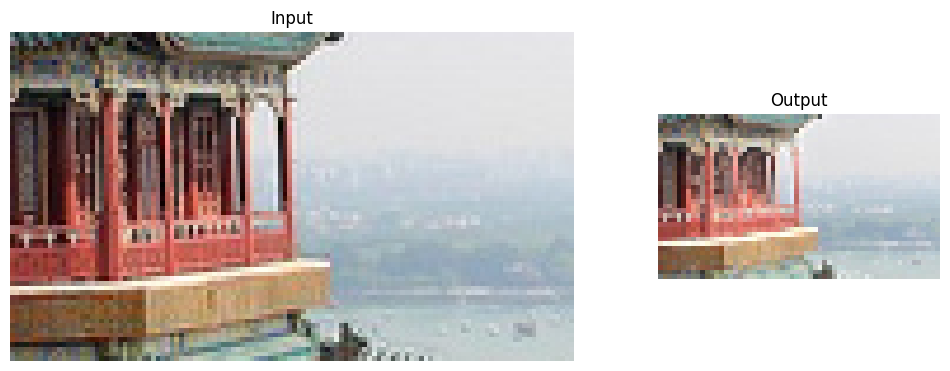

In [19]:
import matplotlib as mpl

fig=plt.figure(figsize=(12,8))
gs=mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])

ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0]) # plot the 1st image
ax1.axis("off")
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0]) # plot the output for the 1st image
ax2.axis("off")
plt.show()